In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="white", context="talk", rc={'figure.figsize':(11,9)})

%matplotlib inline

In [3]:
### выделяем домен из 'Referring Page URL'
def get_domain(url):
    m = re.search('https?:\/\/([^:\/\n]+)', url)
    if m:
        return(m.group(1))    
    else:
        return ''

In [4]:
sl = ['doctorplastic.ru', 'sm-plastica.ru', 'gmt-clinic.ru', 
      'mosplastica.ru', 'seline.ru', 'fnkc-fmba.ru', 'emcmos.ru', 
      'novoclinic.ru', 'westmed.ru','frauklinik.ru','blokhin.ru']

In [5]:
### сравнение общего количества уникальных доменов
domains = []
links = []
ratio = []

df = {}

for name in sl:
    df[name] = pd.read_csv('sets/'+ name + '-all.csv')
    df[name]['Url'] = df[name]['Referring Page URL'].apply(get_domain)
    domains.append(df[name]['Url'].nunique())
    links.append(df[name]['Referring Page URL'].count())
    ratio.append(df[name]['Referring Page URL'].count()/df[name]['Url'].nunique())


/home/sda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


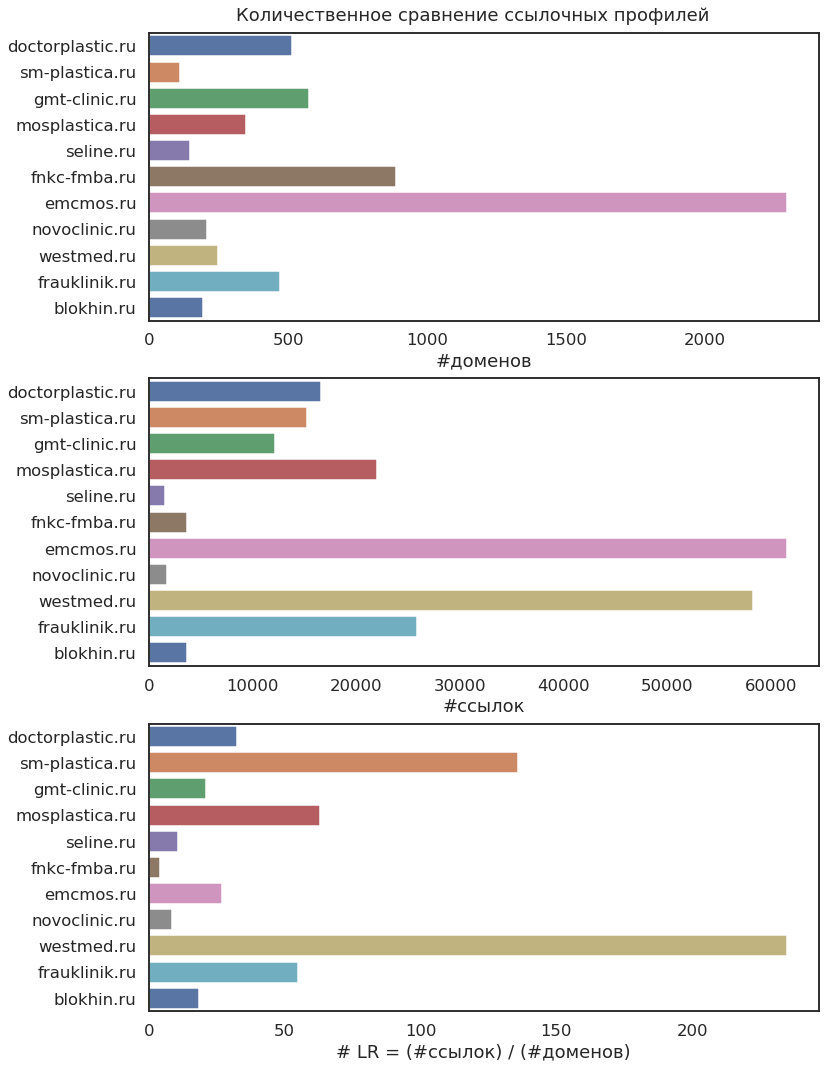

In [6]:

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18), sharey=True)
f.suptitle('Количественное сравнение ссылочных профилей', x=0.5, y=0.90, fontsize=18)
sns.barplot(domains, sl, palette="deep", ax=ax1)
ax1.set_xlabel("#доменов")
sns.barplot(links, sl, palette="deep", ax=ax2)
ax2.set_xlabel("#ссылок")
sns.barplot(ratio, sl, palette="deep", ax=ax3)
ax3.set_xlabel("# LR = (#ссылок) / (#доменов)");


In [7]:
df['frauklinik.ru'].head(2)

,#,Domain Rating,URL Rating (desc),Referring Domains,Referring Page URL,Referring Page Title,Internal Links Count,External Links Count,Link URL,TextPre,...,Backlink Status,First Seen,Last Check,Day Lost,Language,Traffic,Keywords,Js rendered,Linked Domains,Url
0,1,49,32,126.0,https://www.tecrussia.ru/,Пластическая хирургия,291,16,https://www.frauklinik.ru/plasticheskaya-hirur...,NaN,...,NaN,2020-01-06 19:18:31,2020-06-15 22:33:01,NaN,NaN,0.0,0.0,NaN,12,www.tecrussia.ru
1,2,49,32,126.0,https://www.tecrussia.ru/,Пластическая хирургия,291,16,https://www.frauklinik.ru/plasticheskaya-hirur...,NaN,...,NaN,2020-02-28 13:43:42,2020-06-15 22:33:01,NaN,NaN,0.0,0.0,NaN,12,www.tecrussia.ru


In [8]:
#df_agg['doctorplastic.ru'] =  df['doctorplastic.ru'].groupby('Url', as_index=False).agg({'Domain Rating':'max'})

#df_rate_m = pd.merge(df_rate, df_agg['doctorplastic.ru'].groupby('Domain Rating', as_index=False).count(), 
#                     left_on = 'rate', right_on = 'Domain Rating', how = 'outer', left_index=False,
#                     right_index=False, sort=False)\
#                    .drop('Domain Rating', axis=1)\
#                    .rename(columns={'Url':'doctorplastic.ru'})\
#                    .fillna(0)

In [9]:
### хочу вывести распределение по рейтингу ссылающихся сайтов

# 1. сначала группирую датафреймы по доменам и агрегирую по среднему рейтингу сайта 
df_agg = {} 
df_rate = pd.DataFrame({'rate':range(0,100)}) # итоговый с профилями 


for name in sl:
    df_agg[name] =  df[name].groupby('Url', as_index=False).agg({'Domain Rating':'max'})

    df_rate = pd.merge(df_rate, df_agg[name].groupby('Domain Rating', as_index=False).count(), 
                     left_on = 'rate', right_on = 'Domain Rating', how = 'outer', left_index=False,
                     right_index=False, sort=False)\
                    .drop('Domain Rating', axis=1)\
                    .rename(columns={'Url':name})\
                    .fillna(0)


In [10]:
df_rate

,rate,doctorplastic.ru,sm-plastica.ru,gmt-clinic.ru,mosplastica.ru,seline.ru,fnkc-fmba.ru,emcmos.ru,novoclinic.ru,westmed.ru,frauklinik.ru,blokhin.ru
0,0,53.0,16.0,50.0,55.0,10.0,202.0,294.0,49.0,43.0,66.0,12.0
1,1,12.0,3.0,6.0,9.0,2.0,37.0,77.0,10.0,7.0,10.0,4.0
2,2,20.0,2.0,12.0,12.0,4.0,13.0,51.0,6.0,6.0,12.0,3.0
3,3,15.0,1.0,21.0,15.0,4.0,35.0,47.0,12.0,7.0,17.0,8.0
4,4,18.0,1.0,13.0,5.0,4.0,17.0,45.0,7.0,9.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,96,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# ок, теперь его нужно растопить в длинный формат
df_rate_melted = pd.melt(df_rate, id_vars = ['rate'],
                        value_vars = sl, var_name='site', value_name='cnt')

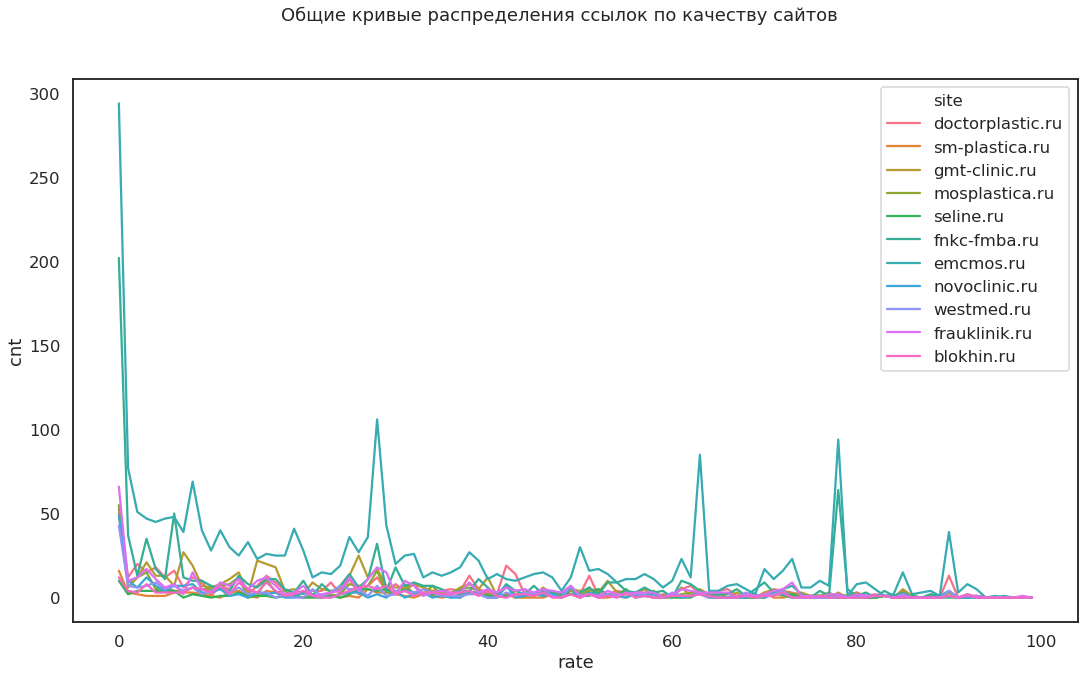

In [12]:
plt.figure( figsize=(18,10))
plt.suptitle('Общие кривые распределения ссылок по качеству сайтов', fontsize=18)
sns.lineplot(x='rate', y='cnt', hue='site', data=df_rate_melted[:])

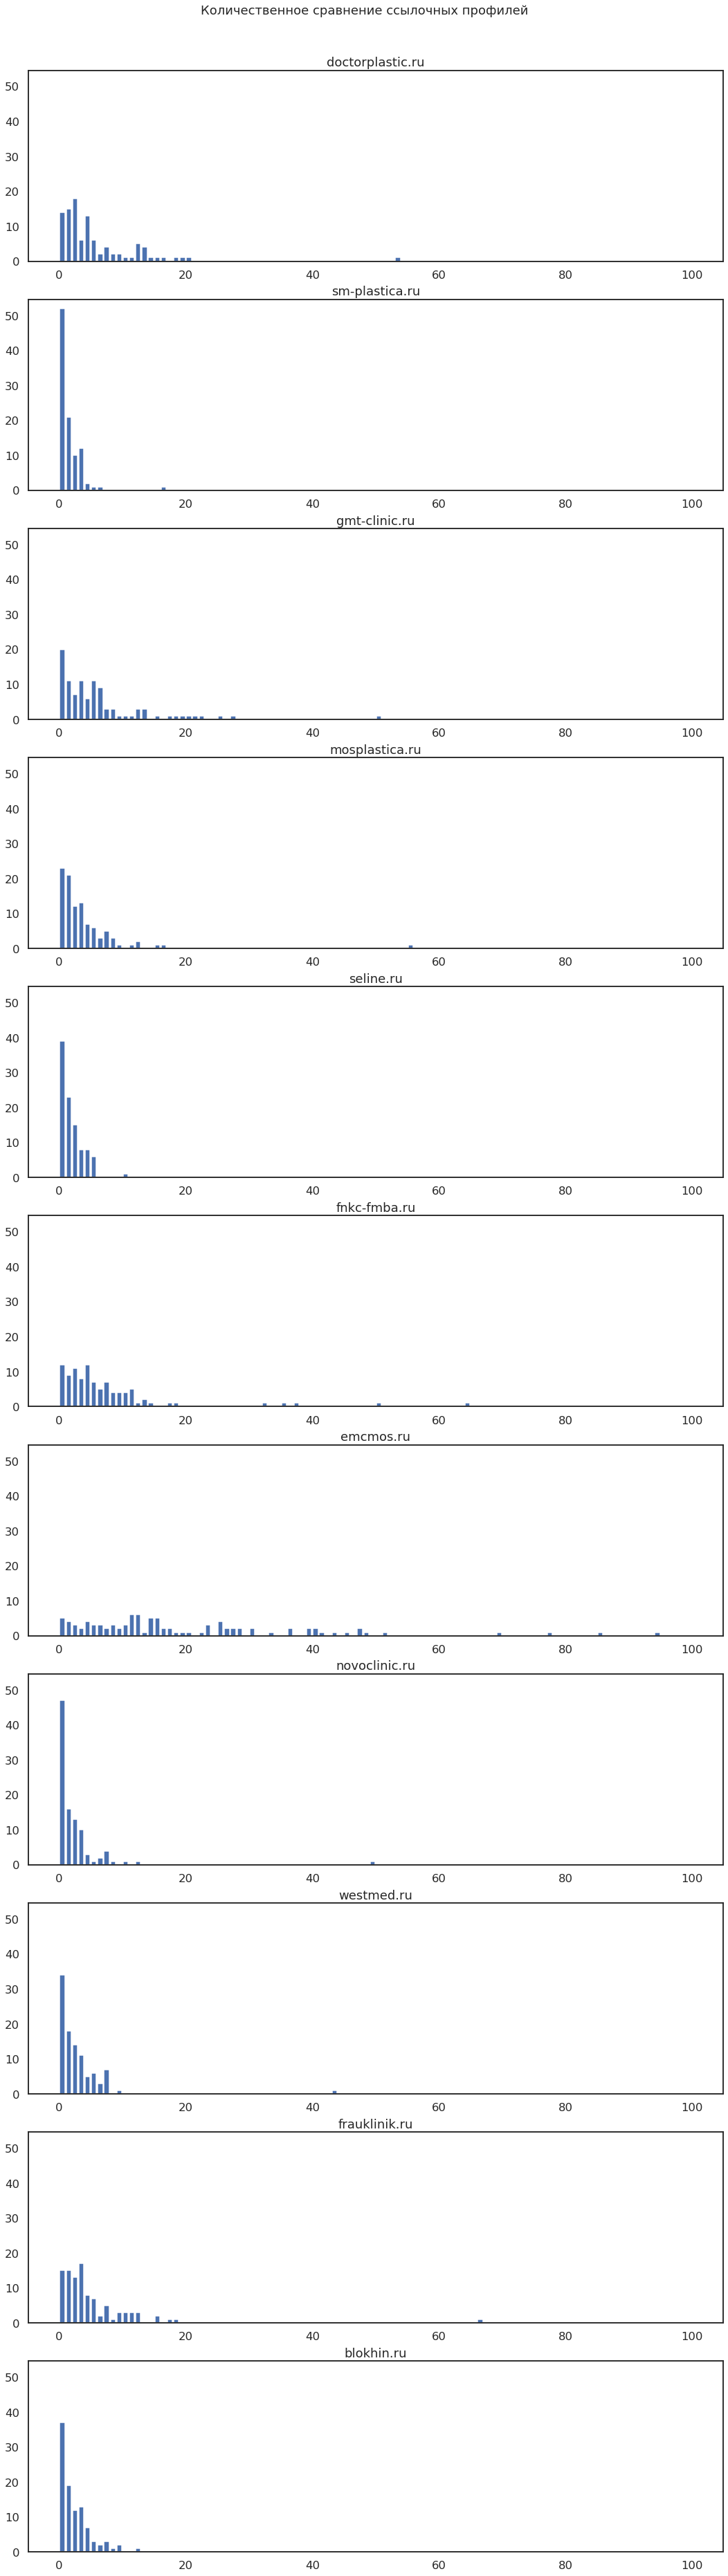

In [13]:
f, axes = plt.subplots(len(sl), 1, figsize=(18,len(sl)*6), sharey=True)
f.suptitle('Количественное сравнение ссылочных профилей', x=0.5, y=0.90, fontsize=18);

i = 0    
for ax in axes:
    ax.set_title(sl[i])
    ax.hist(df_rate[sl[i]], bins = 100, rwidth = 0.8, range=(0,100))
    i = i + 1